In [35]:
import glob
import pandas as pd
#import random
#import paho.mqtt.client as mqtt
import string
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#### Get some stored data

In [36]:
def fetch_stored_data(index=0, folder=None, cycle=True):
    
    if folder is None:
        if cycle:
            folder = '../BLM_R5IM_Data/cycle/'
        else:
            folder = '../BLM_R5IM_Data/R5IM_loss/'
    
    if folder[-1] != '/': folder += '/'        
        
    input_data = pd.read_csv(glob.glob(folder + '*.csv')[index])
    return input_data.drop(columns = input_data.columns[0]).to_numpy()

In [37]:
ls ../BLM_R5IM_Data/cycle/

26_05_2023_00_35_36_034042.csv  26_05_2023_00_35_45_049643.csv
26_05_2023_00_35_36_926089.csv  26_05_2023_00_35_45_987319.csv
26_05_2023_00_35_38_236517.csv  26_05_2023_00_35_48_010611.csv
26_05_2023_00_35_39_115167.csv  26_05_2023_00_35_48_369257.csv
26_05_2023_00_35_39_949234.csv  26_05_2023_00_35_49_086323.csv
26_05_2023_00_35_41_013048.csv  26_05_2023_00_35_50_079591.csv
26_05_2023_00_35_42_031331.csv  26_05_2023_00_35_51_063682.csv
26_05_2023_00_35_43_025596.csv  26_05_2023_00_35_52_020982.csv
26_05_2023_00_35_44_019355.csv  26_05_2023_00_35_53_032674.csv


In [38]:
fetch_stored_data(2, None, False)

array([[-4.99939013e+00, -4.99939013e+00, -4.99939013e+00, ...,
        -4.99939013e+00, -4.99939013e+00, -4.99939013e+00],
       [-5.48999989e-03, -5.48999989e-03, -4.87999991e-03, ...,
        -3.04999994e-03, -3.65999993e-03, -2.43999995e-03],
       [ 1.21999998e-03,  1.21999998e-03,  1.82999996e-03, ...,
         1.09900003e-02,  6.70999987e-03,  7.31999986e-03],
       ...,
       [ 1.82999996e-03, -1.82999996e-03,  0.00000000e+00, ...,
         6.09999988e-04,  3.04999994e-03,  1.21999998e-03],
       [-1.82999996e-03,  3.04999994e-03,  1.82999996e-03, ...,
         3.65999993e-03,  2.43999995e-03,  1.21999998e-03],
       [ 5.06599993e-02,  5.18799983e-02,  5.37099987e-02, ...,
        -1.04979999e-01, -1.04979999e-01, -1.05590001e-01]])

In [39]:
fetch_stored_data()

array([[-4.99939013e+00, -4.99939013e+00, -4.99939013e+00, ...,
        -4.99939013e+00, -4.99939013e+00, -4.99939013e+00],
       [-6.70999987e-03, -4.87999991e-03, -4.26999992e-03, ...,
        -5.48999989e-03, -4.87999991e-03, -4.26999992e-03],
       [-3.04999994e-03,  6.09999988e-04,  1.21999998e-03, ...,
         4.26999992e-03,  4.26999992e-03,  6.09999988e-04],
       ...,
       [-3.04999994e-03,  1.21999998e-03,  2.43999995e-03, ...,
         2.43999995e-03, -1.21999998e-03,  0.00000000e+00],
       [-1.21999998e-03, -1.21999998e-03,  6.09999988e-04, ...,
        -6.70999987e-03, -4.87999991e-03, -4.87999991e-03],
       [ 3.53999995e-02,  3.53999995e-02,  3.60100009e-02, ...,
         2.31899992e-02,  2.31899992e-02,  2.31899992e-02]])

In [40]:
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    print (c,k)

r 3
g 2
b 1
y 0


#### Use all 40 signals

In [41]:
labels = ["r0blm1", "r0blm3", "r0blm4", 
            "r1blm1", "r1blm2", "r1blm3", "r1blm4", 
            "r2blm1", "r2blm2", "r2blm3", "r2blm4", 
            "r3blm1", "r3blm2", "r3blm3", "r3blm4", 
            "r4blm1", "r4blm2", "r4blm3", "r4blm4", 
            "r5blm1", "r5blm2", "r5blm3", "r5blm4", 
            "r6blm1", "r6blm2", "r6blm3", "r6blm4", 
            "r7blm1", "r7blm2", "r7blm3", "r7blm4", 
            "r8blm1", "r8blm2", "r8blm3", "r8blm4", 
            "r9blm1", "r9blm2", "r9blm3", "r9blm4", 
            "r5im"]

Text(0.5, 0, 'BLM Signal (Volts)')

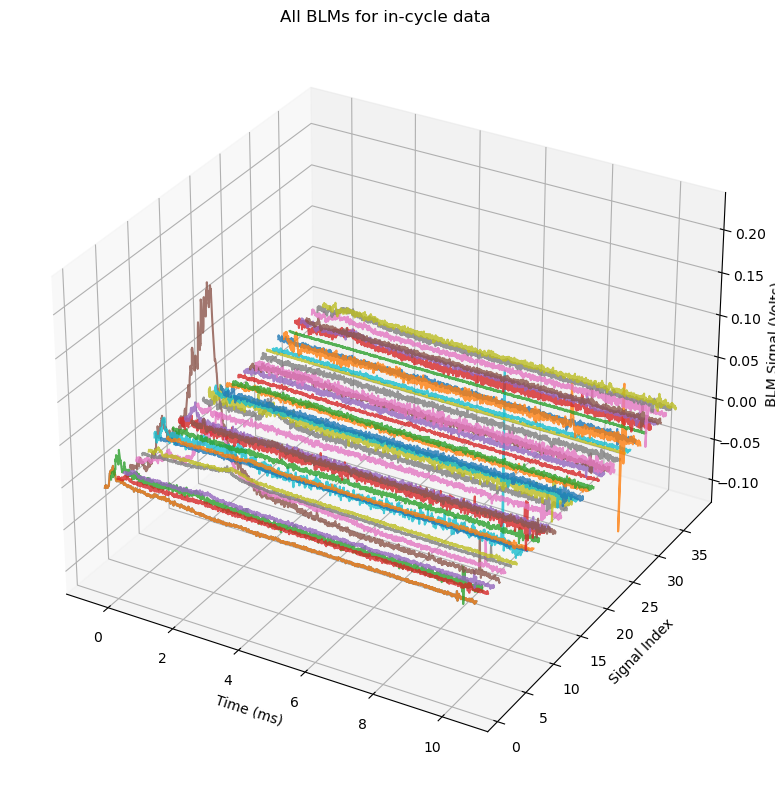

In [67]:
x_data = np.linspace(-.5, 10.5, 2200)
blm_iterator_list = np.linspace(1,38,39, dtype=int)

fig = plt.figure(figsize=(8,8), tight_layout = True)
ax = fig.add_subplot(projection='3d')
for i in blm_iterator_list:
    
    # fetch_stored_data(n, None, False) = R5IM loss data, n = glob file index not BLM index
    # fetch_stored_data(n, None, True) = cycle data, n = glob file index not BLM index
    ax.plot(x_data, fetch_stored_data(0, None, True)[i], zs=i, zdir='y', alpha=0.8)
    
#ax.set_ylim(2,5)
#ax.set_xlim(-0.5, 10.5);
#ax.set_zlim(-0.01, 0.05);
plt.title('All BLMs for in-cycle data')
plt.xlabel('Time (ms)')
plt.ylabel('Signal Index')
ax.set_zlabel('BLM Signal (Volts)')

- [ ] Need to fix Z label being cut off